In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from glob import glob
import seaborn as sns
import PIL
import os

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import sklearn.preprocessing
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten


df_r = pd.read_csv('E:\DataforLab/toyota.csv')
df_r = df_r.drop(columns=['model'])
df_r.head(10)


,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,2017,17498,Manual,36284,Petrol,145,36.2,2.0
5,2017,15998,Manual,26919,Petrol,260,36.2,2.0
6,2017,18522,Manual,10456,Petrol,145,36.2,2.0
7,2017,18995,Manual,12340,Petrol,145,36.2,2.0
8,2020,27998,Manual,516,Petrol,150,33.2,2.0
9,2016,13990,Manual,37999,Petrol,265,36.2,2.0


In [2]:
df_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          6738 non-null   int64  
 1   price         6738 non-null   int64  
 2   transmission  6738 non-null   object 
 3   mileage       6738 non-null   int64  
 4   fuelType      6738 non-null   object 
 5   tax           6738 non-null   int64  
 6   mpg           6738 non-null   float64
 7   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(2)
memory usage: 421.2+ KB


In [3]:
df_f_col = list(['transmission','fuelType'])
df_c = df_r.copy()
df_c = df_c[df_c['fuelType'] != 'Other']

labels = df_c['fuelType']

num_classes = len(df_c['fuelType'].unique())
print(df_c['fuelType'].unique())

for col in df_f_col:
    i = 0
    unique = df_c[col].unique()

    for to_replace_val in unique:
        df_c[col] = df_c[col].replace(to_replace=to_replace_val, value=i, regex=True)
        i = i+1
    df_c[col] = df_c[col].astype("int32")

df_c.head(10)

['Petrol' 'Hybrid' 'Diesel']


,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,2016,16000,0,24089,0,265,36.2,2.0
1,2017,15995,0,18615,0,145,36.2,2.0
2,2015,13998,0,27469,0,265,36.2,2.0
3,2017,18998,0,14736,0,150,36.2,2.0
4,2017,17498,0,36284,0,145,36.2,2.0
5,2017,15998,0,26919,0,260,36.2,2.0
6,2017,18522,0,10456,0,145,36.2,2.0
7,2017,18995,0,12340,0,145,36.2,2.0
8,2020,27998,0,516,0,150,33.2,2.0
9,2016,13990,0,37999,0,265,36.2,2.0


In [4]:
U = df_c.fuelType
X = df_c.drop(['fuelType'], axis=1)

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_std, U, test_size=0.5, random_state=101)

In [5]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history = model.fit(X_train,
                    y_train,
                    epochs=15,
                    batch_size=256,
                    validation_split=0.2,
                    shuffle = True,
                    verbose = 2)


Epoch 1/15
11/11 - 2s - loss: 0.6051 - accuracy: 0.4902 - val_loss: 0.5364 - val_accuracy: 0.6672 - 2s/epoch - 145ms/step
Epoch 2/15
11/11 - 0s - loss: 0.4885 - accuracy: 0.7002 - val_loss: 0.4490 - val_accuracy: 0.7696 - 21ms/epoch - 2ms/step
Epoch 3/15
11/11 - 0s - loss: 0.4079 - accuracy: 0.7787 - val_loss: 0.3767 - val_accuracy: 0.8328 - 20ms/epoch - 2ms/step
Epoch 4/15
11/11 - 0s - loss: 0.3381 - accuracy: 0.8232 - val_loss: 0.3142 - val_accuracy: 0.8554 - 20ms/epoch - 2ms/step
Epoch 5/15
11/11 - 0s - loss: 0.2771 - accuracy: 0.8401 - val_loss: 0.2577 - val_accuracy: 0.8675 - 20ms/epoch - 2ms/step
Epoch 6/15
11/11 - 0s - loss: 0.2206 - accuracy: 0.8533 - val_loss: 0.2054 - val_accuracy: 0.8750 - 19ms/epoch - 2ms/step
Epoch 7/15
11/11 - 0s - loss: 0.1687 - accuracy: 0.8594 - val_loss: 0.1575 - val_accuracy: 0.8780 - 19ms/epoch - 2ms/step
Epoch 8/15
11/11 - 0s - loss: 0.1214 - accuracy: 0.8643 - val_loss: 0.1124 - val_accuracy: 0.8855 - 20ms/epoch - 2ms/step
Epoch 9/15
11/11 - 0s - 

In [6]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                512       
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 577
Trainable params: 577
Non-trainable params: 0
_________________________________________________________________
None


In [7]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

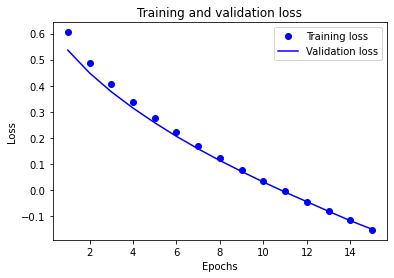

In [8]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)


plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [9]:
score = model.evaluate(X_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: -0.17283949255943298
Test accuracy: 0.880313515663147


In [18]:
#PART 2 CNN Image recognition (dog vs cat).

In [82]:
destination = r"E:\DataforLab/training_set/"

for folder in os.listdir(destination):
    files = glob(destination + folder + "/*.jpg")
    print(f'({folder}): {len(files)} image')

(test_set): 2023 image
(training_set): 10028 image


In [84]:
train_images_size = []

files = glob(destination + "training_set/" + "/*.jpg")
for file in files:
    img = cv2.imread(file)
    train_images_size.append(img.shape)
        
pd.Series(train_images_size).value_counts()

(374, 500, 3)    1185
(375, 499, 3)    1165
(499, 375, 3)     106
(333, 499, 3)      99
(500, 374, 3)      94
                 ... 
(172, 252, 3)       1
(362, 400, 3)       1
(164, 200, 3)       1
(247, 149, 3)       1
(469, 373, 3)       1
Length: 4196, dtype: int64

In [85]:
test_images_size = []

files = glob(destination + "test_set/" + "/*.jpg")
for file in files:
    img = cv2.imread(file)
    train_images_size.append(img.shape)
        
pd.Series(train_images_size).value_counts()

(374, 500, 3)    1430
(375, 499, 3)    1401
(499, 375, 3)     129
(333, 499, 3)     122
(500, 374, 3)     111
                 ... 
(359, 281, 3)       1
(303, 359, 3)       1
(342, 314, 3)       1
(436, 291, 3)       1
(469, 373, 3)       1
Length: 4196, dtype: int64

In [86]:
categorical = {"cat":0, "dog":1} 
image_size  = 150

In [87]:
def getKey(myValue):
    for key, value in categorical.items():
        if myValue == value:
            return key

In [88]:
X = []
y = []

files = glob(destination + "training_set/" + "/*.jpg")
for file in files:
        
    if "dog" in file:
        y.append(1)
    else:
        y.append(0)
        
    img = cv2.imread(file)
    new_train_size = cv2.resize(img, (image_size, image_size))
    X.append(new_train_size)

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(f"X_train: {len(X_train)} , y_train: {len(y_train)}")
print(f"X_test: {len(X_test)} , y_test: {len(y_test)}")

X_train: 8022 , y_train: 8022
X_test: 2006 , y_test: 2006


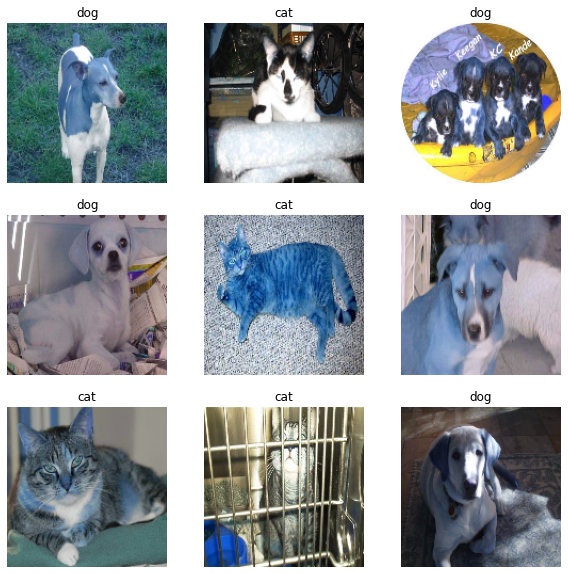

In [91]:
plt.figure(figsize=(10,10))
for n , i in enumerate(list(np.random.randint(0,len(X_train),9))) : 
    plt.subplot(3,3,n+1)
    plt.imshow(X_train[i])   
    plt.axis('off')
    plt.title(getKey(y_train[i]))
    

In [92]:
pred = []

files = glob(destination + "test_set/" + "/*.jpg")
for file in files:
    img = cv2.imread(file)
    new_test_size = cv2.resize(img, (image_size, image_size))
    pred.append(new_train_size)

In [93]:
print(f"pred: {len(pred)}")

pred: 2023


In [95]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test  = np.array(X_test)
y_test  = np.array(y_test)
X_pred  = np.array(pred)

print(f'X_train shape  is {X_train.shape}')
print(f'y_train shape  is {y_train.shape} \n')
print(f'X_test  shape  is {X_test.shape}')
print(f'y_test  shape  is {y_test.shape} \n')
print(f'X_pred  shape  is {X_pred.shape}')

X_train shape  is (8022, 150, 150, 3)
y_train shape  is (8022,) 

X_test  shape  is (2006, 150, 150, 3)
y_test  shape  is (2006,) 

X_pred  shape  is (2023, 150, 150, 3)


In [98]:
Model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=(image_size,image_size,3)),
        #tf.keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
        tf.keras.layers.MaxPool2D(2,2),
    
        tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu'),    
        #tf.keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
        tf.keras.layers.MaxPool2D(2,2),
    
        tf.keras.layers.Flatten(),    
        tf.keras.layers.Dense(256,activation='relu'),
        tf.keras.layers.Dropout(rate=0.3),
        tf.keras.layers.Dense(1, activation='sigmoid'), 
        ])
Model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_37 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 74, 74, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 72, 72, 32)        18464     
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 41472)             0         
                                                                 
 dense_25 (Dense)            (None, 256)             

In [99]:
Model.compile(optimizer =tf.keras.optimizers.Adam(learning_rate=0.0001),
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

history = Model.fit(X_train, y_train, epochs=15)

Epoch 1/15
251/251 [==============================] - 229s 911ms/step - loss: 1.7744 - accuracy: 0.5911
Epoch 2/15
251/251 [==============================] - 226s 901ms/step - loss: 0.5751 - accuracy: 0.6887
Epoch 3/15
251/251 [==============================] - 230s 915ms/step - loss: 0.4736 - accuracy: 0.7725
Epoch 4/15
251/251 [==============================] - 227s 904ms/step - loss: 0.3571 - accuracy: 0.8470
Epoch 5/15
251/251 [==============================] - 226s 901ms/step - loss: 0.2464 - accuracy: 0.9005
Epoch 6/15
251/251 [==============================] - 226s 902ms/step - loss: 0.1718 - accuracy: 0.9375
Epoch 7/15
251/251 [==============================] - 227s 903ms/step - loss: 0.1241 - accuracy: 0.9589
Epoch 8/15
251/251 [==============================] - 225s 898ms/step - loss: 0.0918 - accuracy: 0.9721
Epoch 9/15
251/251 [==============================] - 226s 899ms/step - loss: 0.0641 - accuracy: 0.9830
Epoch 10/15
251/251 [==============================] - 226s 899m

Text(0.5, 0, 'Epochs')

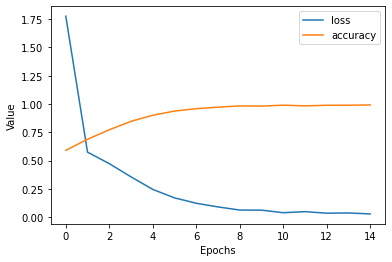

In [100]:
pd.DataFrame(history.history).plot()
plt.ylabel("Value")
plt.xlabel("Epochs")

In [103]:
Loss, Accuracy = Model.evaluate(X_test, y_test)

print('Loss is: ', Loss)
print('Accuracy is: ', Accuracy)

'''
# serialize model to JSON
model_json = Model.to_json()
with open("model_alt.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
Model.save_weights("model_alt.h5")
print("Saved model to disk")
'''

63/63 [==============================] - 17s 267ms/step - loss: 1.0979 - accuracy: 0.7263
Loss is:  1.097941517829895
Accuracy is:  0.7263210415840149


'\n# serialize model to JSON\nmodel_json = Model.to_json()\nwith open("model_alt.json", "w") as json_file:\n    json_file.write(model_json)\n    \n# serialize weights to HDF5\nModel.save_weights("model_alt.h5")\nprint("Saved model to disk")\n'

In [15]:
#PART 3 Power consumption prediction with RNN.

from keras.layers import Dense,Dropout,SimpleRNN,LSTM

In [22]:
df=pd.read_csv('E:\DataforLab/AEP_hourly.csv', index_col='Datetime', parse_dates=['Datetime'])
df.head()

,AEP_MW
Datetime,
2004-12-31 01:00:00,13478.0
2004-12-31 02:00:00,12865.0
2004-12-31 03:00:00,12577.0
2004-12-31 04:00:00,12517.0
2004-12-31 05:00:00,12670.0


In [23]:
df.isna().sum()

AEP_MW    0
dtype: int64

In [25]:
train_test_data = df.copy()

train_test_data.head()

,AEP_MW
Datetime,
2004-12-31 01:00:00,13478.0
2004-12-31 02:00:00,12865.0
2004-12-31 03:00:00,12577.0
2004-12-31 04:00:00,12517.0
2004-12-31 05:00:00,12670.0


In [38]:
scaler = sklearn.preprocessing.MinMaxScaler()

train_test_data_norm = train_test_data.copy()
train_test_data_norm['AEP_MW']=scaler.fit_transform(train_test_data_norm['AEP_MW'].values.reshape(-1,1))

train_test_data_norm.shape

(121273, 1)

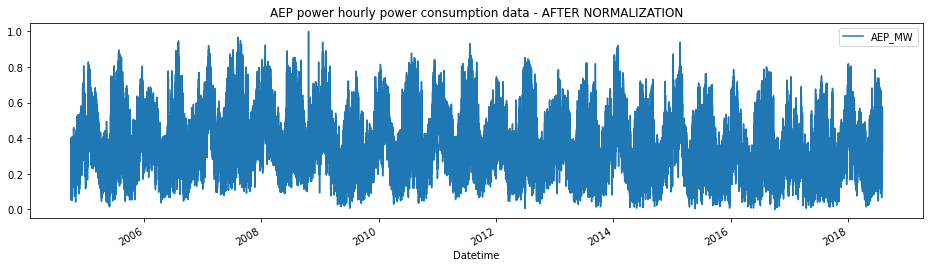

In [29]:
train_test_data_norm.plot(figsize=(16,4),legend=True)

plt.title('AEP power hourly power consumption data - AFTER NORMALIZATION')
plt.show()

In [31]:
seq_len = 20

X_train = []
y_train = []
for i in range(seq_len, len(train_test_data_norm)):
    X_train.append(train_test_data_norm.iloc[i-seq_len : i, 0])
    y_train.append(train_test_data_norm.iloc[i, 0])
    
X_test = X_train[110000:]             
y_test = y_train[110000:]
    
X_train = X_train[:110000]           
y_train = y_train[:110000]
    

X_train = np.array(X_train)
y_train = np.array(y_train)
    
X_test = np.array(X_test)
y_test = np.array(y_test)
    
X_train = np.reshape(X_train, (110000, seq_len, 1))  
X_test = np.reshape(X_test, (X_test.shape[0], seq_len, 1))

print('X_train.shape = ',X_train.shape)
print('y_train.shape = ', y_train.shape)
print('X_test.shape = ', X_test.shape)
print('y_test.shape = ',y_test.shape)

X_train.shape =  (110000, 20, 1)
y_train.shape =  (110000,)
X_test.shape =  (11253, 20, 1)
y_test.shape =  (11253,)


In [32]:
rnn_model = Sequential()

rnn_model.add(SimpleRNN(40,activation="tanh",return_sequences=True, input_shape=(X_train.shape[1],1)))
rnn_model.add(Dropout(0.15))

rnn_model.add(SimpleRNN(40,activation="tanh",return_sequences=True))
rnn_model.add(Dropout(0.15))

rnn_model.add(SimpleRNN(40,activation="tanh",return_sequences=False))
rnn_model.add(Dropout(0.15))

rnn_model.add(Dense(1))

rnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 20, 40)            1680      
                                                                 
 dropout (Dropout)           (None, 20, 40)            0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 20, 40)            3240      
                                                                 
 dropout_1 (Dropout)         (None, 20, 40)            0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 40)                3240      
                                                                 
 dropout_2 (Dropout)         (None, 40)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                

In [33]:
rnn_model.compile(optimizer="adam",loss="MSE")
rnn_model.fit(X_train, y_train, epochs=10, batch_size=1000)

'''
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)

optimizer = keras.optimizers.SGD(learning_rate=lr_schedule)

rnn_model.compile(optimizer=optimizer, loss='mean_squared_error')
rnn_model.fit(X_train, y_train, epochs=10, batch_size=1000)
'''

Epoch 1/10
110/110 [==============================] - 6s 35ms/step - loss: 0.0678
Epoch 2/10
110/110 [==============================] - 4s 35ms/step - loss: 0.0135
Epoch 3/10
110/110 [==============================] - 4s 35ms/step - loss: 0.0076
Epoch 4/10
110/110 [==============================] - 4s 35ms/step - loss: 0.0054
Epoch 5/10
110/110 [==============================] - 4s 35ms/step - loss: 0.0044
Epoch 6/10
110/110 [==============================] - 4s 35ms/step - loss: 0.0036
Epoch 7/10
110/110 [==============================] - 4s 37ms/step - loss: 0.0032
Epoch 8/10
110/110 [==============================] - 4s 37ms/step - loss: 0.0028
Epoch 9/10
110/110 [==============================] - 4s 38ms/step - loss: 0.0025
Epoch 10/10
110/110 [==============================] - 4s 36ms/step - loss: 0.0023


"\nlr_schedule = keras.optimizers.schedules.ExponentialDecay(\n    initial_learning_rate=1e-2,\n    decay_steps=10000,\n    decay_rate=0.9)\n\noptimizer = keras.optimizers.SGD(learning_rate=lr_schedule)\n\nrnn_model.compile(optimizer=optimizer, loss='mean_squared_error')\nrnn_model.fit(X_train, y_train, epochs=10, batch_size=1000)\n"

In [34]:
rnn_predictions = rnn_model.predict(X_test)

rnn_score = r2_score(y_test, rnn_predictions)
print("R2 Score of RNN model = ", rnn_score)

R2 Score of RNN model =  0.9684479678172461


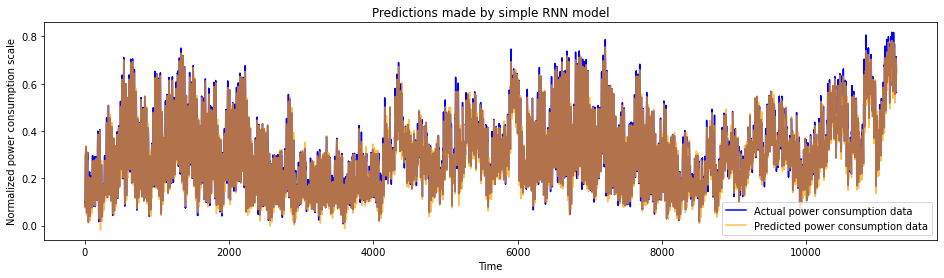

In [37]:
plt.figure(figsize=(16,4))
plt.plot(y_test, color='blue',label='Actual power consumption data')
plt.plot(rnn_predictions, alpha=0.7, color='orange',label='Predicted power consumption data')
plt.title("Predictions made by simple RNN model")
plt.xlabel('Time')
plt.ylabel('Normalized power consumption scale')
plt.legend()
plt.show()
